# <center><font color = '#DF9166' size = 20 center> **Data Preprocessing**</font></center>



## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
2. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)

## <font color = '#DF9166' size=6>**Import Libraries**<font/><a class = 'anchor' id = 'import'/>


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
sns.set_style("whitegrid")
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

In [2]:
sys.path.append(os.path.abspath(os.path.pardir))
from scripts.preprocess_data import *

## <font color = '#DF9166' size=6>**Data Loading**<font/><a class = 'anchor' id = 'data_loading'/>

In [8]:
DATA_PATH = "../data/raw/data.csv"

In [9]:
df = pd.read_csv(DATA_PATH, index_col=0)
df.head(2)

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0


## <font color = '#DF9166' size=6>**Data Inspection**<font/><a class = 'anchor' id = 'data_inspection'/>

In [9]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (95662, 16)


In [10]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  Frau

- **Rows:** 95,662  
- **Columns:** 16 (1 float64, 4 int64, 11 object)  
- **Non-null values:** All columns are fully populated.

In [12]:
print("Number of Unique Values in Each Column:\n")
print("_" * 70, f"{'Column Name':>45} |  Unique Values", "_" * 70, sep="\n")
for col in df.columns:
    print(f"{col:>45} | {df[col].nunique()}")
print("_" * 70)

Number of Unique Values in Each Column:

______________________________________________________________________
                                  Column Name |  Unique Values
______________________________________________________________________
                                TransactionId | 95662
                                      BatchId | 94809
                                    AccountId | 3633
                               SubscriptionId | 3627
                                   CustomerId | 3742
                                 CurrencyCode | 1
                                  CountryCode | 1
                                   ProviderId | 6
                                    ProductId | 23
                              ProductCategory | 9
                                    ChannelId | 4
                                       Amount | 1676
                                        Value | 1517
                         TransactionStartTime | 94556
                          

- **High Uniqueness:** `TransactionId`, `BatchId`, `TransactionStartTime`.  
- **Low Uniqueness:** `CurrencyCode`, `CountryCode` (both 1 unique value).  
- **Limited Providers:** `ProviderId` (6 unique values).  
- **Product Diversity:** `ProductId` (23 unique), `ProductCategory` (9 unique).  
- **Moderate Uniqueness:** `AccountId`, `SubscriptionId`, `CustomerId`.  
- **Fraud Detection:** `FraudResult` (2 unique values, likely binary).  
- **Varied Transaction Sizes:** `Amount` and `Value` have many unique values.

In [6]:
categorical_columns = [
    "TransactionId",
    "BatchId",
    "AccountId",
    "SubscriptionId",
    "CustomerId",
    "CurrencyCode",
    "CountryCode",
    "ProviderId",
    "ProductId",
    "ProductCategory",
    "ChannelId",
    "TransactionStartTime",
    "PricingStrategy",
    "FraudResult",
]

numerical_columns = ["Amount", "Value"]

In [7]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TransactionId         95662 non-null  object
 1   BatchId               95662 non-null  object
 2   AccountId             95662 non-null  object
 3   SubscriptionId        95662 non-null  object
 4   CustomerId            95662 non-null  object
 5   CurrencyCode          95662 non-null  object
 6   CountryCode           95662 non-null  int64 
 7   ProviderId            95662 non-null  object
 8   ProductId             95662 non-null  object
 9   ProductCategory       95662 non-null  object
 10  ChannelId             95662 non-null  object
 11  TransactionStartTime  95662 non-null  object
 12  PricingStrategy       95662 non-null  int64 
 13  FraudResult           95662 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 10.2+ MB


Some categorical columns are stored as integers (`int64`).They need to be converted to categorical types ensures appropriate analysis and processing.

In [8]:
columns_to_convert = ["CountryCode", "PricingStrategy", "FraudResult"]
df[columns_to_convert] = df[columns_to_convert].astype("object")

In [9]:
print("Missing values and their proportions (%):")
missing_values_proportions(df)

Missing values and their proportions (%):


,Missing Values,Proportion (%)


There is no missing values in our dataframe.

In [10]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [11]:
print("Summary statistics for numerical columns:\n")
df[numerical_columns].describe().transpose()

Summary statistics for numerical columns:



,count,mean,std,min,25%,50%,75%,max
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0


- **Amount:** High variability with large transactions and negative values (refunds or errors).  
- **Value:** Wide range, with small and large transactions; median around 1,000 suggests mid-range dominance.

In [12]:
print("Summary statistics for categorical columns:\n")
df[categorical_columns].describe(include=["object"]).transpose()

Summary statistics for categorical columns:



,count,unique,top,freq
TransactionId,95662,95662,TransactionId_35670,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
CountryCode,95662,1,256,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405


- **High Uniqueness:** Most columns (e.g., `TransactionId`, `BatchId`, `TransactionStartTime`) have unique or near-unique values, indicating individualized transactions.
- **Dominant Values:**  
  - `CurrencyCode` and `CountryCode` are uniform (UGX, 256), suggesting all transactions are from a single country and currency.
  - `ProviderId`, `ProductCategory`, and `ChannelId` have clear leaders, with some values (e.g., `ProviderId_4`, `ChannelId_3`) being significantly more frequent.
- **Customer & Product Focus:**  
  - Some customers (`AccountId_4841`, `SubscriptionId_3829`) have a very high transaction count, hinting at key customer segments.  
  - `ProductCategory` is heavily skewed towards **financial_services**.
- **Fraud Detection:** The majority of transactions have a `FraudResult` of 0, indicating most are non-fraudulent.

## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>

### Handling Outliers

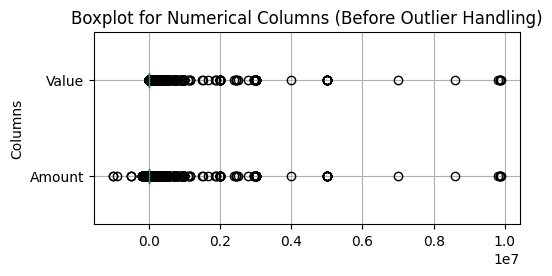

In [13]:
# Detect Outliers Using Boxplots
plt.figure(figsize=(5.5, 2.5))
df[numerical_columns].boxplot(vert=False)
plt.title("Boxplot for Numerical Columns (Before Outlier Handling)")
plt.ylabel("Columns")
plt.show()

In [14]:
# Replace outliers with boundaries for all numerical columns
df = handle_outliers(df, numerical_columns, plot_box=False, replace_with="mean")

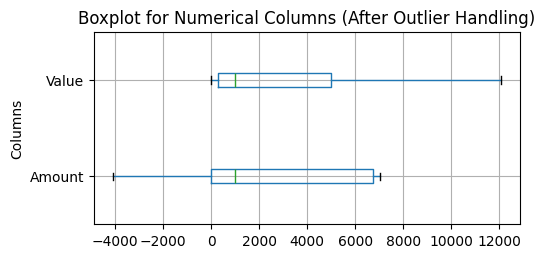

In [15]:
# Detect Outliers Using Boxplots
plt.figure(figsize=(5.5, 2.5))
df[numerical_columns].boxplot(vert=False)
plt.title("Boxplot for Numerical Columns (After Outlier Handling)")
plt.ylabel("Columns")
plt.show()

In [16]:
# Check for remaining outliers using Z-Score
print("\nColumns with Potential Outliers After Z-Score Analysis:\n")
for col in numerical_columns:
    z_scores = zscore(df[col])
    outliers = (np.abs(z_scores) > 3).sum()
    print(f"{col:>45}: {outliers} potential outliers")


Columns with Potential Outliers After Z-Score Analysis:

                                       Amount: 0 potential outliers
                                        Value: 0 potential outliers


In [17]:
df.to_csv("../data/processed/cleaned_data.csv")